# Loading Dataset

You can download the dataset from {https://challenge.isic-archive.com/data/#2018}.
The data from **Task 3** will be used in this assignment. You should download the Training Data and its corresponding ground truth labels. The dataset consists of 10015 skin images from 7 classes. We will extract the images of 7 classes (Melanoma, Melanocytic nevi, Basal cell carcinoma, Actinic keratoses and intraepithelial carcinoma (akaic), Benign keratosis-like lesions, Dermatofibroma\ and Vascular lesions) and save them as .npy file with the following code:


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Replace these paths with the actual paths to your dataset folders
data_folder = "/content/drive/MyDrive/DeepLearningAssignment/ISIC2018_Task3_Training_Input/"
ground_truth_folder = "/content/drive/MyDrive/DeepLearningAssignment/ISIC2018_Task3_Training_GroundTruth/"

csv_file_path = os.path.join(ground_truth_folder, "ISIC2018_Task3_Training_GroundTruth.csv")
df = pd.read_csv(csv_file_path)

image_data = []
labels = []
run=False


# Class mapping
class_mapping = {
    tuple([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]): "Melanoma",
    tuple([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]): "Melanocytic nevi",
    tuple([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]): "Basal cell carcinoma",
    tuple([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]): "Acaic",
    tuple([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]): "Benign keratosis-like lesions",
    tuple([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]): "Dermatofibroma",
    tuple([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]): "Vascular lesions"
}


if run:
  print("start saving files")
  for index, row in df.iterrows():
      image_title = row['image']
      label = row.drop('image', axis=0)  # Drop the 'image' column to keep only labels

      image_path = os.path.join(data_folder, image_title + ".jpg")

      try:
          # Open the image using PIL (or you can use OpenCV) within a 'with' statement
          with Image.open(image_path) as image:
              if image is not None:
                  # Resize images
                  im = image.resize((120,150), Image.LANCZOS)
                  # Append image and label to respective lists
                  image_data.append(np.array(im))
                  labels.append(label)
              else:
                  print(f"Error opening image '{image_path}': NoneType object returned")
      except Exception as e:
          print(f"Error opening image '{image_path}': {e}")

  tr_labels = np.array(labels)
  image_matrix = np.array([np.array(img) for img in image_data])

  np.save("/content/drive/MyDrive/DeepLearningAssignment/data.npy",image_matrix)
  np.save("/content/drive/MyDrive/DeepLearningAssignment/labels.npy",tr_labels)
  # Convert float labels to class names
  class_labels = [class_mapping[tuple(label)] for label in tr_labels]
  np.save("/content/drive/MyDrive/DeepLearningAssignment/labels_name.npy",class_labels)






Once you save your data, you can load it from your directory.

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_dir = "/content/drive/MyDrive/DeepLearningAssignment/"
data = np.load(file_dir + "data.npy")
labels = np.load(file_dir + "labels.npy", allow_pickle=True)
class_labels = np.load(file_dir + "labels_name.npy")



## Preprocessing

In [4]:
#split the data
from sklearn.model_selection import train_test_split

x_trainval, x_test, y_trainval, y_test = train_test_split(data, labels, test_size = 0.2, random_state=42, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size = 0.2, random_state=42)

#after splitting the data, normalize the image data to floating point numbers between 0 and 1 (scaling) and convert the target labels to floats (size 32 to prevent crashes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
y_val = y_val.astype('float32')

x_train = x_train/ 255.0
x_test = x_test/ 255.0
x_val = x_val/ 255.0

# Visualizing Sample images

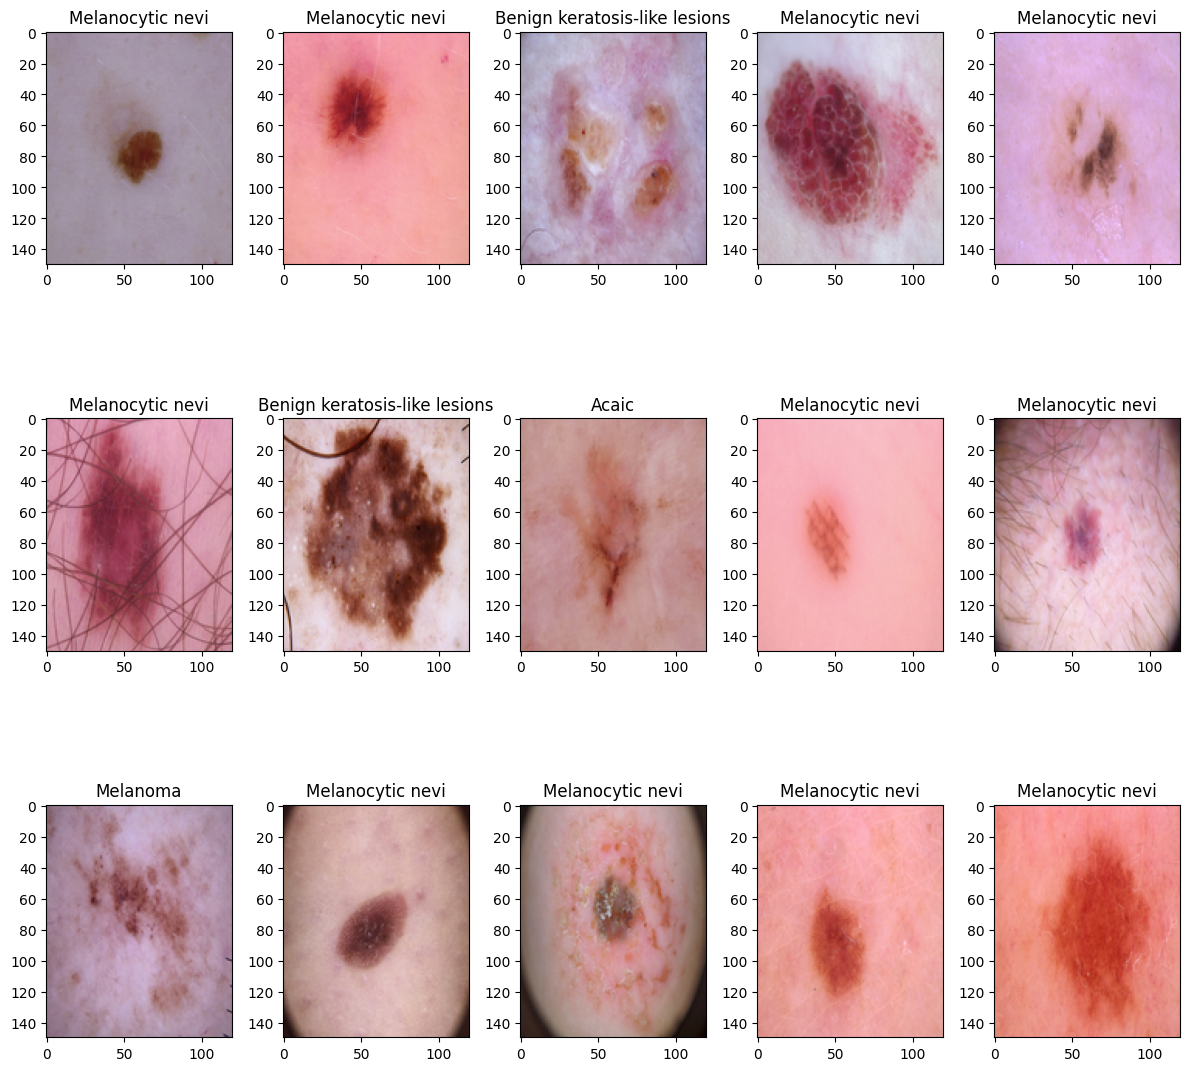

In [5]:
#Randomly select 15 samples. display the images for these samples with the corresponsing label as text above the image
#Arrange these images and labels in a single figure, ensuring that they are visually clear and labeled appropriatly.
import random

# Generate a list of 15 random indices
random_indices = random.sample(range(len(data)), 15)

# Create a 3x5 subplot grid
fig, axes = plt.subplots(3, 5, figsize=(12, 12))

# Plot the 15 random samples
for i, idx in enumerate(random_indices):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    ax.imshow(data[idx], cmap=plt.get_cmap('gray'))
    ax.set_title(f'{class_labels[idx]}')

# Remove any remaining empty subplots
for i in range(len(random_indices), 3 * 5):
    row = i // 5
    col = i % 5
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()



# Visualize Class Label Distribution

Melanocytic nevi                 6705
Melanoma                         1113
Benign keratosis-like lesions    1099
Basal cell carcinoma              514
Acaic                             327
Vascular lesions                  142
Dermatofibroma                    115
Name: class_labels, dtype: int64


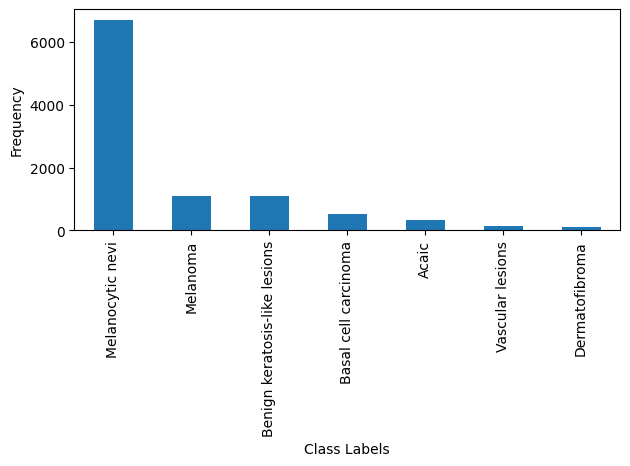

In [6]:
#Bar plot for class representation
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df = pd.DataFrame({'class_labels': class_labels})

# Each class is counted and added within the bar plot
df['class_labels'].value_counts().plot(ax=ax, kind='bar', xlabel='Class Labels', ylabel='Frequency')
print(df['class_labels'].value_counts())



plt.show()

# Baseline Model

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


#Creating the model
base_model = Sequential()

#Adding two convoluional layers followed by the MaxPooled layer
base_model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = x_train.shape[1:]))
base_model.add(Conv2D(32, (3, 3), activation = "relu"))
base_model.add(MaxPooling2D((2, 2)))

#Repeating the above added layers
base_model.add(Conv2D(64, (3, 3), activation = "relu"))
base_model.add(Conv2D(32, (3, 3), activation = "relu"))
base_model.add(MaxPooling2D((2, 2)))

#Add a flatten layer so the input is readable for the dense layers added below
base_model.add(Flatten())

#Add the two dense layers
base_model.add(Dense(32, activation = 'relu'))
base_model.add(Dense(32, activation = 'relu'))

#Add the output layer (7 nodes for 7 classes, softmax for multiclass classification)
base_model.add(Dense(7, activation = "softmax"))

#summarize the model
base_model.summary()

#compile the model (categorical_crossentropy because of the categorical data)
base_model.compile(loss = "categorical_crossentropy",
                   optimizer = "adam",
                   metrics = ['accuracy'])

#fitting the model
history = base_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
val_loss, val_acc = base_model.evaluate(x_val, y_val)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 118, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 116, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 58, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 56, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 54, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 34, 27, 32)        0         
 g2D)                                                   

# Plot the loss and the accuracy of the baseline model

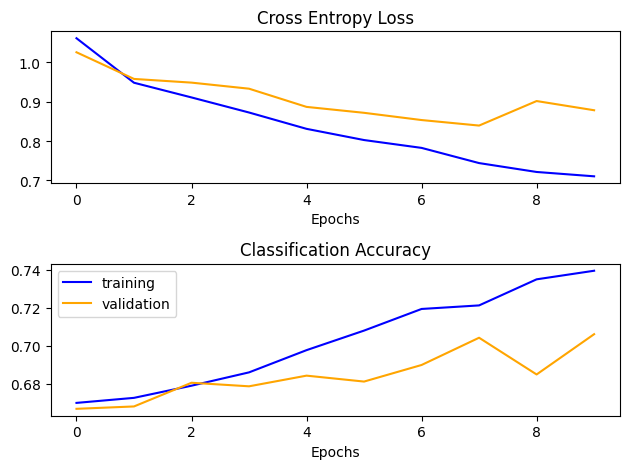

In [8]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.xlabel('Epochs')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='validation')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.xlabel('Epochs')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='validation')
	plt.legend(['training', 'validation'])
	plt.show()

summarize_diagnostics(history)

# ROC curve of the baseline model

63/63 [==============================] - 1s 19ms/step


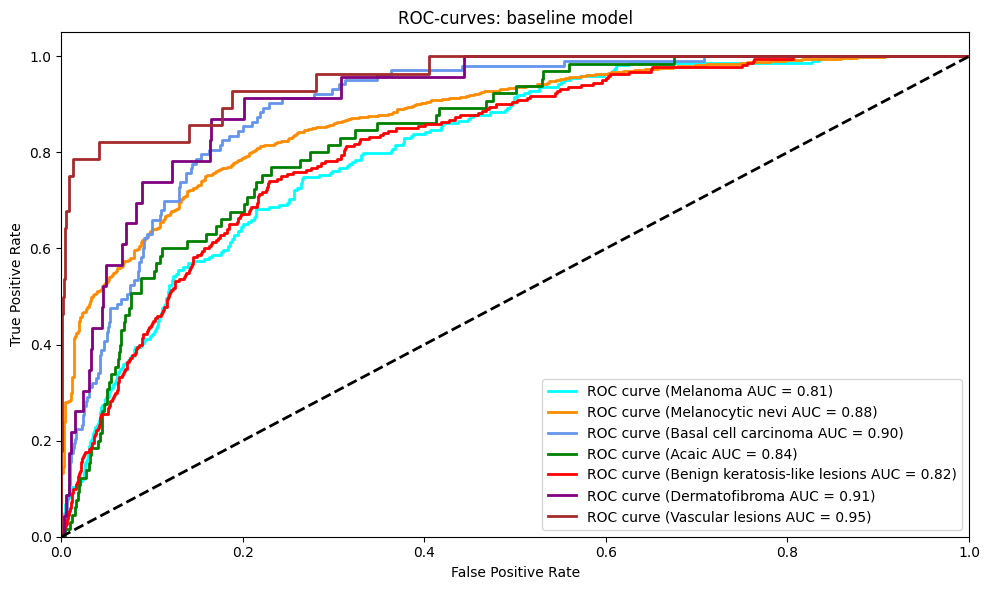

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle

y_pred_baseline = base_model.predict(x_test)

n_classes = 7
fpr = dict()
tpr = dict()
roc_auc = dict()

#Creating the ROC curve of each different class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_baseline[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Plot these curves within one figure
plt.figure(figsize=(10, 6))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown'])

class_labels = ['Melanoma', 'Melanocytic nevi', 'Basal cell carcinoma', 'Acaic', 'Benign keratosis-like lesions', 'Dermatofibroma', 'Vascular lesions']

for i, color, label in zip(range(n_classes), colors, class_labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve ({} AUC = {:.2f})'.format(label, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curves: baseline model')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix of the baseline model
First matrix is for validation data,

Second matrix is for test data

51/51 [==============================] - 1s 13ms/step


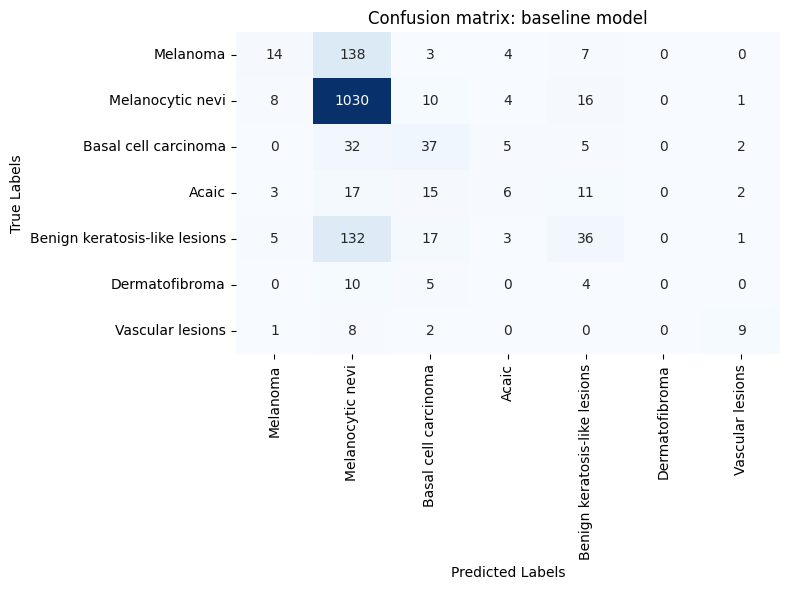

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ['Melanoma', 'Melanocytic nevi', 'Basal cell carcinoma', 'Acaic', 'Benign keratosis-like lesions', 'Dermatofibroma', 'Vascular lesions']

y_pred_baseline = base_model.predict(x_val)
y_pred_classes_baseline = np.argmax(y_pred_baseline, axis=1)
y_true_classes = np.argmax(y_val, axis=1)
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes_baseline)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion matrix: baseline model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

63/63 [==============================] - 1s 13ms/step


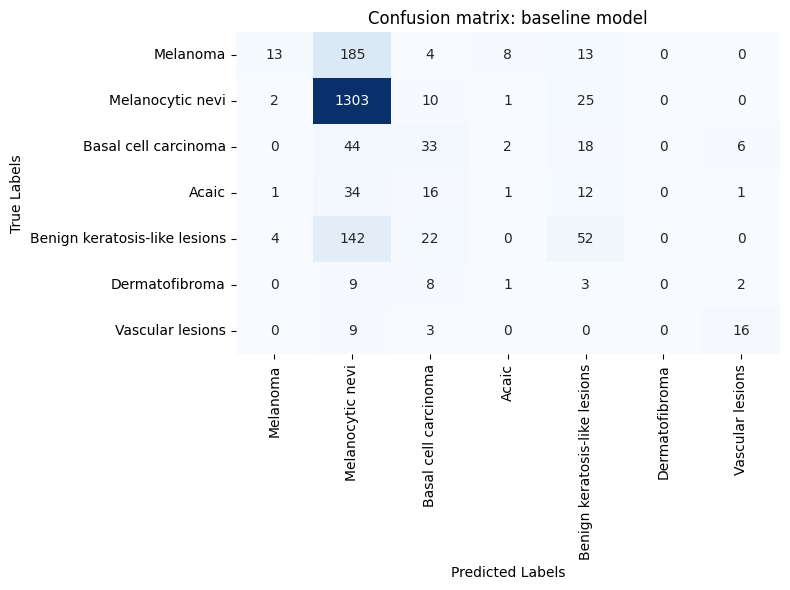

In [11]:
class_labels = ['Melanoma', 'Melanocytic nevi', 'Basal cell carcinoma', 'Acaic', 'Benign keratosis-like lesions', 'Dermatofibroma', 'Vascular lesions']

y_pred_baseline_test = base_model.predict(x_test)
y_pred_classes_baseline_test = np.argmax(y_pred_baseline_test, axis=1)
y_true_classes_test = np.argmax(y_test, axis=1)
confusion_mtx_test = confusion_matrix(y_true_classes_test, y_pred_classes_baseline_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx_test, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion matrix: baseline model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Function that calculates the 4 different measures to report


In [12]:
### Function for evaluating the different models
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

def evaluation_measures(y_true, y_pred):
    """
    Calculate and return Accuracy, Specificity, Sensitivity (True Positive Rate), and F1 Score.

    Parameters:
    - y_true: True labels (ground truth)
    - y_pred: Predicted labels

    Returns:
    - accuracy: Accuracy
    - specificity: Specificity
    - sensitivity: Sensitivity (True Positive Rate)
    - f1: F1 Score
    """
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Specificity and sensitivity for each class
    specificity = []
    sensitivity = []
    for i in range(len(cm)):
        tn = sum(cm[j][j] for j in range(len(cm)) if j != i)
        fp = sum(cm[j][i] for j in range(len(cm)) if j != i)
        fn = sum(cm[i][j] for j in range(len(cm)) if j != i)
        tp = cm[i][i]

        specificity_i = tn / (tn + fp)
        sensitivity_i = tp / (tp + fn)

        specificity.append(specificity_i)
        sensitivity.append(sensitivity_i)

    # Weighted-averaged F1 Score
    f1 = f1_score(y_true, y_pred, average='weighted')

    return accuracy, specificity, sensitivity, f1

# Evaluation measures for the baseline model

In [13]:
# Calculate evaluation measures
accuracy, specificity, sensitivity, f1 = evaluation_measures(y_true_classes_test, y_pred_classes_baseline_test)

print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Weighted-averaged F1 Score:", f1)

Accuracy: 0.707938092860709
Specificity: [0.9950424929178471, 0.2137546468401487, 0.9564917127071824, 0.9916025192442267, 0.9505915100904663, 1.0, 0.9936215450035436]
Sensitivity: [0.05829596412556054, 0.9716629381058911, 0.32038834951456313, 0.015384615384615385, 0.23636363636363636, 0.0, 0.5714285714285714]
Weighted-averaged F1 Score: 0.6404060805782661


# Building the Enhanced Model

In [14]:
##### Tried to work with SMOTE to fight the imbalance in the data
# # Get the dimensions of the training data
# original_shapes = [arr.shape for arr in x_train]


# # Flatten the data into 2 dimensions so it can be used as input for SMOTE
# x_train_flat = x_train.reshape(x_train.shape[0], -1)

# print("Original x_train shape:", x_train.shape)
# print("x_train_flat shape:", x_train_flat.shape)
# print("y_train shape:", y_train.shape)


# from imblearn.over_sampling import SMOTE

# sm = SMOTE()
# x_train_sm, y_train_sm = sm.fit_resample(x_train_flat, y_train)

# #Check the shapes and class distribution
# print("Previous number of samples:", x_train_flat.shape)
# print("New number of samples:", x_train_sm.shape)
# print(np.unique(y_train_sm, return_counts=True))

# # x_train_sm is the SMOTE-oversampled data
# # Define the original shape
# height, width, channels = x_train.shape[1], x_train.shape[2], x_train.shape[3]
# new_num_samples = x_train_sm.shape[0]

# # Reshape the SMOTE-oversampled data back to the original 4D shape
# x_train_sm_4d = x_train_sm.reshape(new_num_samples, height, width, channels)

# # Now x_train_sm_4d should have the shape (6409, 150, 120, 3), similar to your original data


In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LeakyReLU
from keras.regularizers import l2
import tensorflow as tf

def swish(x):
    return x * tf.sigmoid(x)

#Creating the model
enhanced_model_g = Sequential()

#Adding two convoluional layers followed by the MaxPooled layer
enhanced_model_g.add(Conv2D(64, (2, 2), activation=swish, input_shape = x_train.shape[1:]))
enhanced_model_g.add(Conv2D(32, (2, 2), activation=swish))
enhanced_model_g.add(MaxPooling2D((2, 2)))

#Repeating the above added layers
enhanced_model_g.add(Conv2D(64, (2, 2), activation=swish))
enhanced_model_g.add(Conv2D(32, (2, 2), activation=swish))
enhanced_model_g.add(MaxPooling2D((2, 2)))

#Repeating the above added layers
enhanced_model_g.add(Conv2D(64, (2, 2), activation=swish))
enhanced_model_g.add(Conv2D(32, (2, 2), activation=swish))
enhanced_model_g.add(MaxPooling2D((2, 2)))

#Repeating the above added layers
enhanced_model_g.add(Conv2D(64, (2, 2), activation=swish))
enhanced_model_g.add(Conv2D(32, (2, 2), activation=swish))
enhanced_model_g.add(MaxPooling2D((2, 2)))

#Add a flatten layer so the input is readable for the dense layers added below
enhanced_model_g.add(Flatten())

#Add the two dense layers
enhanced_model_g.add(Dense(128, activation=swish, kernel_regularizer=l2(0.001)))
enhanced_model_g.add(Dense(128, activation=swish, kernel_regularizer=l2(0.001)))
enhanced_model_g.add(Dense(64, activation=swish, kernel_regularizer=l2(0.001)))
enhanced_model_g.add(Dense(32, activation=swish, kernel_regularizer=l2(0.001)))

#Add the output layer (7 nodes for 7 classes, softmax for multiclass classification)
enhanced_model_g.add(Dense(7, activation = "softmax"))

#summarize the model
enhanced_model_g.summary()

#compile the model (categorical_crossentropy because of the categorical data)
enhanced_model_g.compile(loss = "categorical_crossentropy",
                   optimizer = "adam",
                   metrics = ['accuracy'])

#fitting the model
history = enhanced_model_g.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))
val_loss, val_acc = enhanced_model_g.evaluate(x_val, y_val)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 149, 119, 64)      832       
                                                                 
 conv2d_5 (Conv2D)           (None, 148, 118, 32)      8224      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 59, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 73, 58, 64)        8256      
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 57, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 28, 32)        0         
 g2D)                                                 

# Plot the loss and the accuracy of the enhanced model

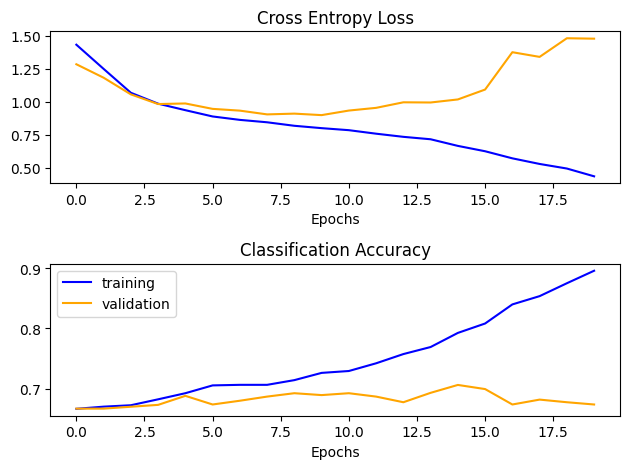

In [16]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.xlabel('Epochs')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='validation')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.xlabel('Epochs')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='validation')
	plt.legend(['training', 'validation'])
	plt.show()

summarize_diagnostics(history)

## ROC curve for the enhanced model

63/63 [==============================] - 2s 25ms/step


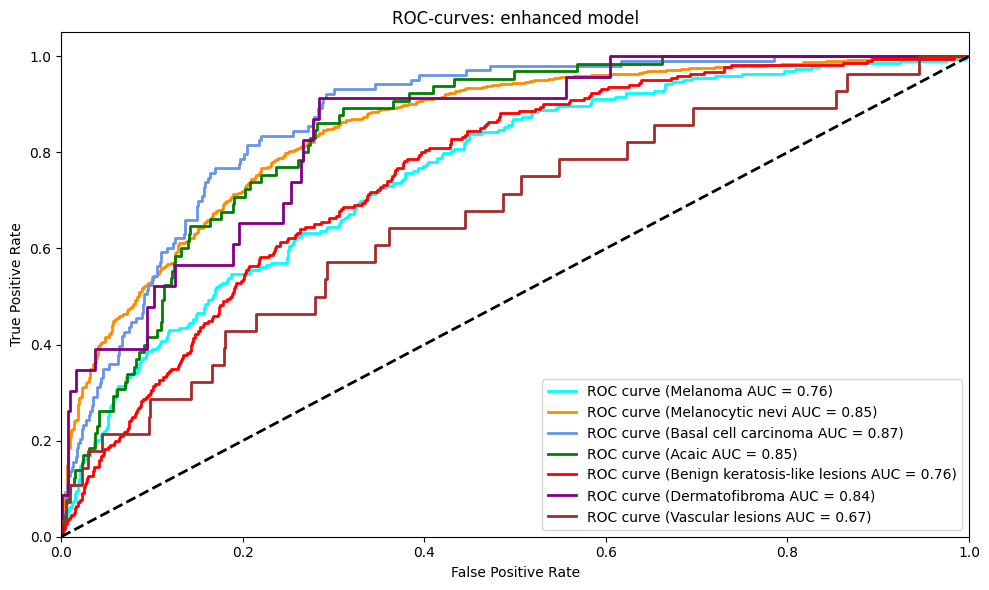

In [17]:
y_pred_enhanced = enhanced_model_g.predict(x_test)

n_classes = 7
fpr = dict()
tpr = dict()
roc_auc = dict()

#Creating the ROC curve of each different class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_enhanced[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Plot these curves within one figure
plt.figure(figsize=(10, 6))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown'])

class_labels = ['Melanoma', 'Melanocytic nevi', 'Basal cell carcinoma', 'Acaic', 'Benign keratosis-like lesions', 'Dermatofibroma', 'Vascular lesions']

for i, color, label in zip(range(n_classes), colors, class_labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve ({} AUC = {:.2f})'.format(label, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curves: enhanced model')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix for the enhanced model

63/63 [==============================] - 1s 19ms/step


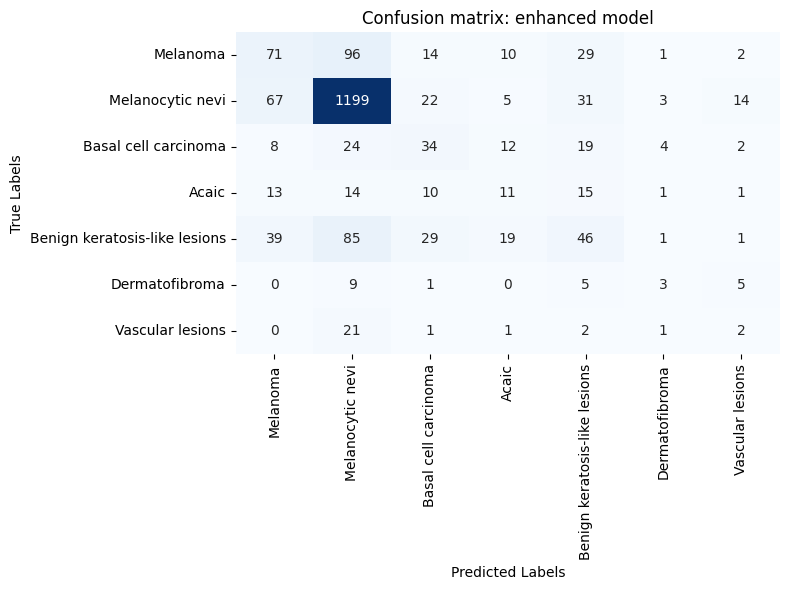

In [18]:
y_pred_enhanced = enhanced_model_g.predict(x_test)
y_pred_enhanced = np.argmax(y_pred_enhanced, axis=1)

class_labels = ['Melanoma', 'Melanocytic nevi', 'Basal cell carcinoma', 'Acaic', 'Benign keratosis-like lesions', 'Dermatofibroma', 'Vascular lesions']

confusion_mtx = confusion_matrix(y_true_classes_test, y_pred_enhanced)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion matrix: enhanced model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Evaluation measures enhanced model


In [19]:
# Calculate evaluation measures
accuracy, specificity, sensitivity, f1 = evaluation_measures(y_true_classes_test, y_pred_enhanced)

print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Weighted-averaged F1 Score:", f1)

Accuracy: 0.6819770344483275
Specificity: [0.9106891701828411, 0.4014423076923077, 0.9453513129879347, 0.9664764621968617, 0.9289232934553132, 0.9919941775836972, 0.9820014398848093]
Sensitivity: [0.3183856502242152, 0.8941088739746458, 0.3300970873786408, 0.16923076923076924, 0.20909090909090908, 0.13043478260869565, 0.07142857142857142]
Weighted-averaged F1 Score: 0.6657451102943313


## Transfer Learning Model

In [20]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

#Loading VGG16 model with its weights
vgg_model1 = VGG16(include_top=False, input_shape=(150, 120, 3))

#Making the base model layers not trainable
for layer in vgg_model1.layers:
    layer.trainable = False

vgg_model1.summary()

#Flatten the base model outputs
flat1 = Flatten()(vgg_model1.output)

#Adding dense layers
class1 = Dense(128, activation='relu')(flat1)
output = Dense(7, activation='softmax')(class1)

#Creating the model
vgg_model = Model(inputs=vgg_model1.input, outputs=output)

#Compiling
vgg_model.compile(loss="categorical_crossentropy",
                   optimizer="adam",
                   metrics=['accuracy'])

#Fit the model
history = vgg_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
val_loss, val_acc = vgg_model.evaluate(x_test, y_test)


58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 120, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 120, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 120, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 60, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 60, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 60, 128)       147584    
                                                              

# Plot the loss and the accuracy of the transfer learning model

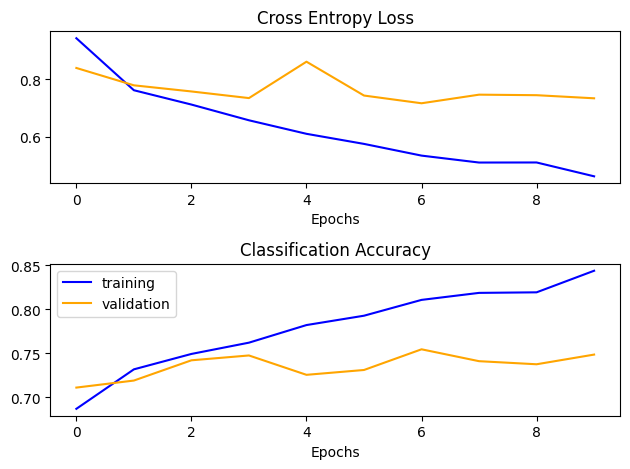

In [21]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.xlabel('Epochs')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='validation')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.xlabel('Epochs')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='validation')
	plt.legend(['training', 'validation'])
	plt.show()

summarize_diagnostics(history)

# ROC curve for the transfer learning model

63/63 [==============================] - 3s 51ms/step


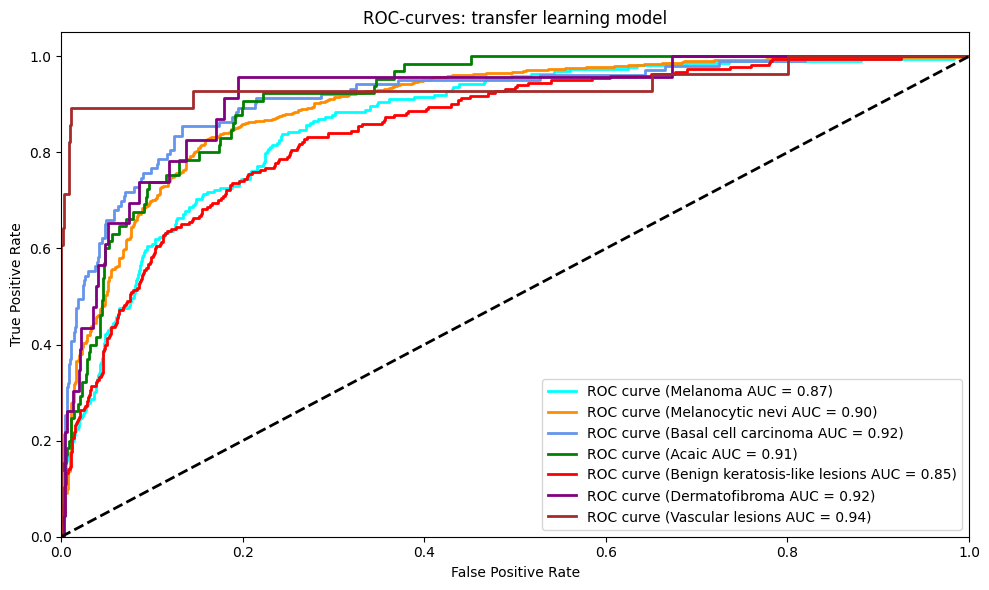

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle

y_pred_transfer = vgg_model.predict(x_test)

n_classes = 7
fpr = dict()
tpr = dict()
roc_auc = dict()

#Creating the ROC curve of each different class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_transfer[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Plot these curves within one figure
plt.figure(figsize=(10, 6))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown'])

class_labels = ['Melanoma', 'Melanocytic nevi', 'Basal cell carcinoma', 'Acaic', 'Benign keratosis-like lesions', 'Dermatofibroma', 'Vascular lesions']

for i, color, label in zip(range(n_classes), colors, class_labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve ({} AUC = {:.2f})'.format(label, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curves: transfer learning model')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix for the transfer learning model

63/63 [==============================] - 3s 51ms/step


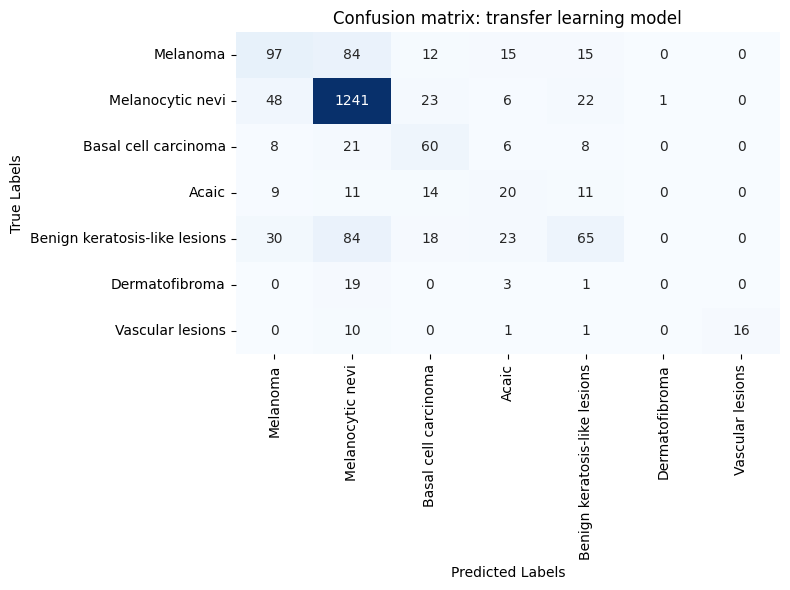

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true_classes_test = np.argmax(y_test, axis=1)

y_pred_transfer = vgg_model.predict(x_test)
y_pred_transfer = np.argmax(y_pred_transfer, axis=1)

class_labels = ['Melanoma', 'Melanocytic nevi', 'Basal cell carcinoma', 'Acaic', 'Benign keratosis-like lesions', 'Dermatofibroma', 'Vascular lesions']

confusion_mtx = confusion_matrix(y_true_classes_test, y_pred_transfer)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion matrix: transfer learning model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Evaluation measures transfer learning model

In [24]:
# Calculate evaluation measures
accuracy, specificity, sensitivity, f1 = evaluation_measures(y_true_classes_test, y_pred_transfer)

print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Weighted-averaged F1 Score:", f1)

Accuracy: 0.7483774338492262
Specificity: [0.9365397461589846, 0.5297741273100616, 0.9555112881806109, 0.9647749510763209, 0.9611260053619303, 0.9993333333333333, 1.0]
Sensitivity: [0.4349775784753363, 0.9254287844891872, 0.5825242718446602, 0.3076923076923077, 0.29545454545454547, 0.0, 0.5714285714285714]
Weighted-averaged F1 Score: 0.7311455831003207
